# Introduction

As the house price is a Continuous Variable, in this project we are going to design a linear regression model to predict the house price. 

# Business Question

**Can we predict the house price in the US market?**

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Data Preparation

In this project, we are going to use the **USA_Housing** dataset. This dataset is available to download [here](https://www.kaggle.com/vedavyasv/usa-housing).

In [3]:
#reading the dataset
ush = pd.read_csv('USA_Housing.csv')

Let's check the head of **ush**, and check out its info() and describe() methods!

In [4]:
ush.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
ush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
ush.shape

(5000, 7)

There are seven columns in our dataset with 5000 rows.

In [7]:
ush.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Exploratory Data Analysis

Let's explore the data!

In [8]:
#setting up the style and size of the plots
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,7)})

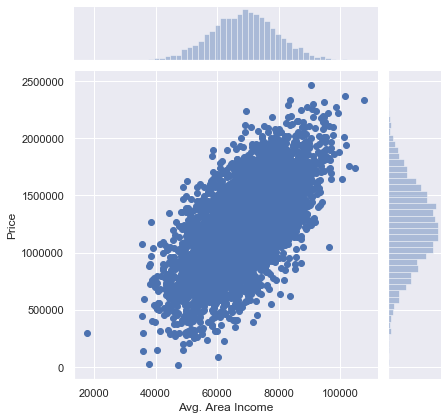

In [9]:
sns.jointplot(data = ush, x = 'Avg. Area Income',y = 'Price')

Based on above plot, we can say there is a correlation between **price** and **Avg Area Income**.

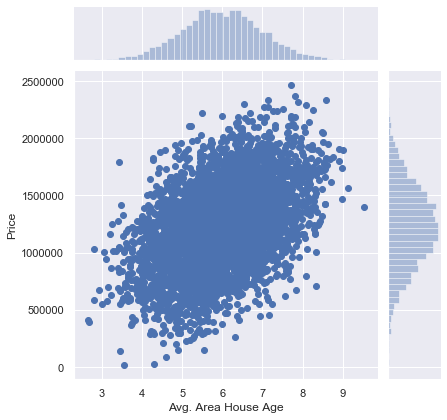

In [10]:
sns.jointplot(data = ush, x = 'Avg. Area House Age',y = 'Price')

Based on above plots, we can say there is a **correlation** between **price** and **Avg Area House Age**.

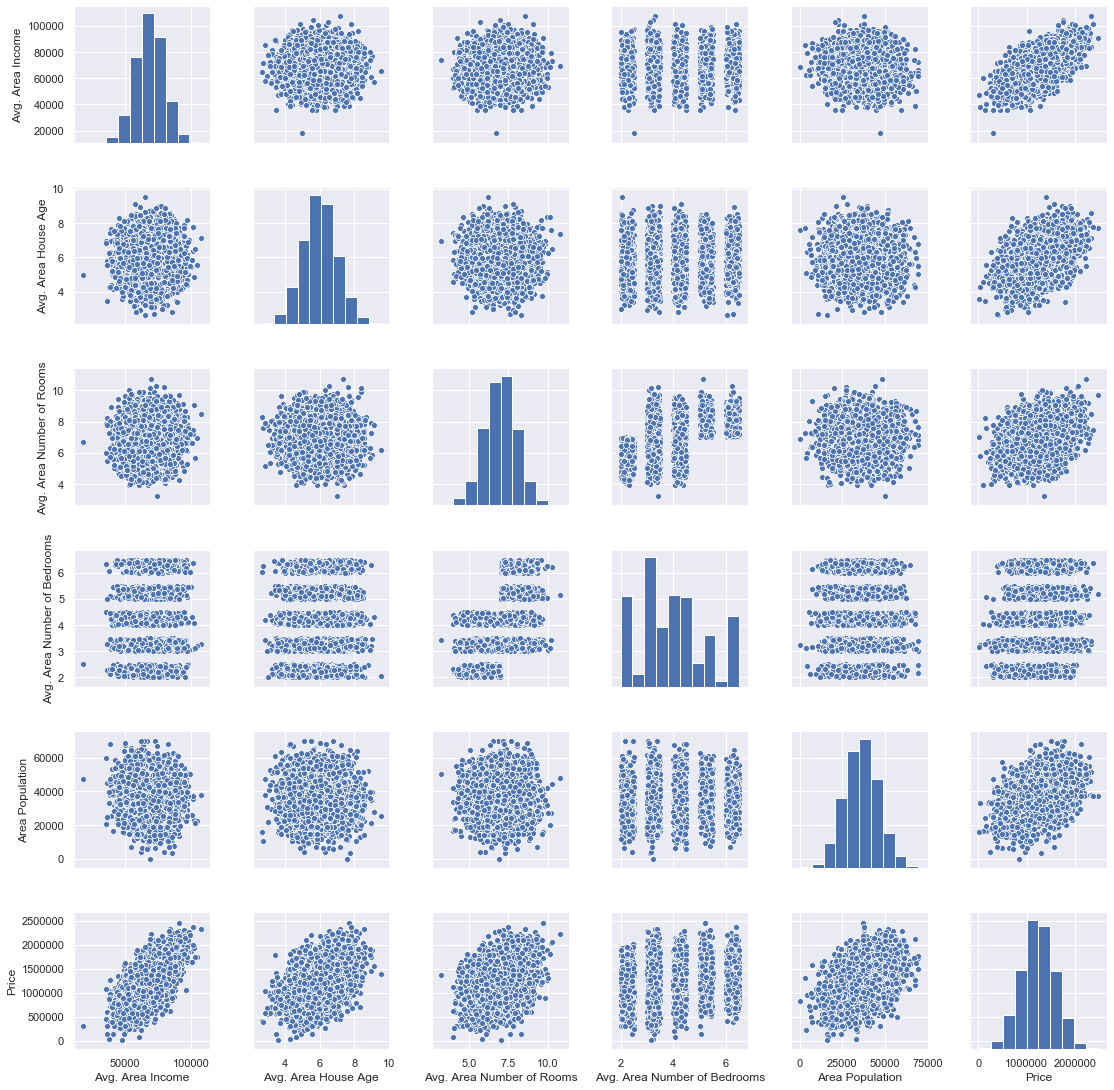

In [11]:
sns.pairplot(ush)

Based on above plot, the most correlated feature with price is Avg. Area Income.

Let's create a linear model plot (using seaborn's lmplot) of Price vs. Avg. Area Income!

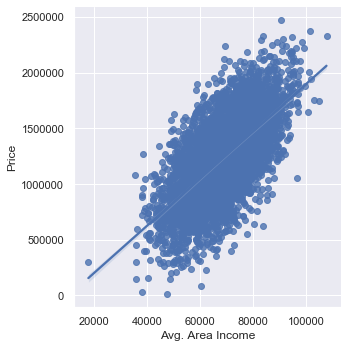

In [12]:
sns.lmplot(x = 'Avg. Area Income', y = 'Price', data = ush)

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [13]:
y = ush['Price']

In [14]:
X = ush[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

Now that we specified our X and y, let's split the data into training and testing sets!

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In order to have more reliable predictions, let's rescaling the input variables using standardization.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Now it's time to train our model on our training data.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#create an instance of a LinearRegression() model named lm
lm = LinearRegression(normalize = True)

In [20]:
#Train/fit lm on the training daata
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [21]:
#Print out the coefficients of the model
lm.coef_

array([232679.72464304, 163841.04659288, 121110.55547764,   2892.81511895,
       151252.34237708])

# Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [22]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

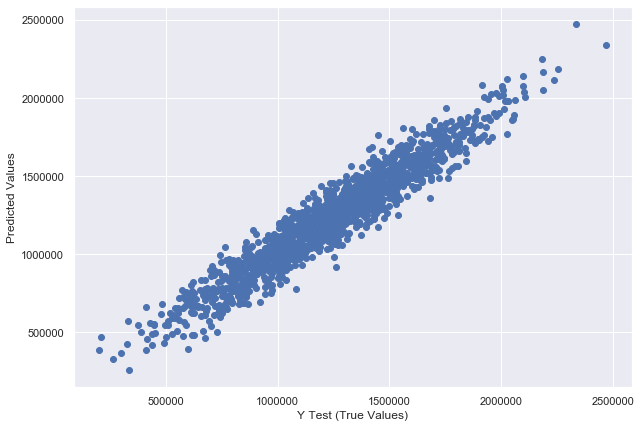

In [23]:
#create a scatterplot of the real test values vs. the predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

# Evaluating the Model

Let's evaluate our model performance!

In [24]:
from sklearn import metrics

In [25]:
#calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  81135.56609336878
MSE  10068422551.40088
RMSE  100341.52954485436


In [26]:
metrics.explained_variance_score(y_test,predictions)

0.9147412103528018

# Residuals

Let's quickly explore the residuals to make sure everything was OK with our data!

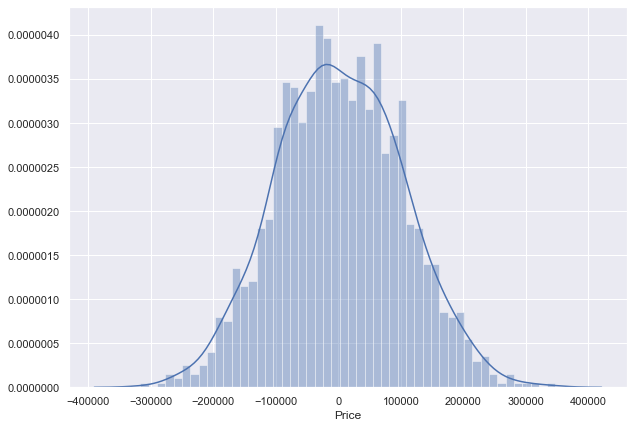

In [27]:
sns.distplot((y_test - predictions), bins = 50)

Above plot shows that our data looks pretty normal.

In [28]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


The way to interpret above Coefficients is one at the time. We need to keep one Coefficient and hold all other features fixed. So,
- One unit increase in the Avg. Area Income, is associated with an increase of around $232680 in price.

- One unit increase in the Avg. Area House Age, is associated with an increase of around $163841 in price.

- One unit increase in the Avg. Area Number of Rooms, is associated with an increase of around $121110 in price.

- One unit increase in the Avg. Area Number of Bedrooms, is associated with an increase of around $2893 in price.

- One unit increase in the Area Population, is associated with an increase of around $151252 in price.